Charkhari
Kulpahar
Mahoba
Mahoba


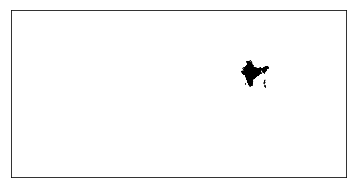

In [2]:
%matplotlib inline
from matplotlib.mlab import prctile_rank
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import numpy as np
import sys
sys.path.append('..')
from pickle_fns import *
file="D:\AI-ML\census\IND_adm\IND_adm2"
bfile="D:\AI-ML\census\IND_adm\IND_adm3"
map= Basemap()
shp_info=map.readshapefile(file, 'IND_adm2')
bshp_info=map.readshapefile(bfile, 'IND_adm3')
dist_name='Tikamgarh'
dist_name='Jalaun'
dist_name='Mahoba'
boundaries=[]
for info, lightning in zip(map.IND_adm3_info, map.IND_adm3):
    if(info['NAME_2']==dist_name):
        print(info['NAME_3'])
        x, y = zip(*lightning)
        boundaries.append((x, y))
    
for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
    if(info['NAME_2']==dist_name):
        print(info['NAME_2'])
        x, y = zip(*lightning) 
        boundaries.append((x, y))
#         break


lonpt, latpt = map(x,y,inverse=True)
# divfac=10

In [3]:
# x, y = zip(*lightning)
# x,y
# boundaries

In [4]:
# for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
#     if(info['NAME_1']=='Uttar Pradesh'):
#         print(info)

In [9]:
# lllon,urlon,lllat,urlat
# ix,iy
# x,y
# vesdf['VES No.']
# for loc in section:
#     print(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float),section)

In [6]:
def get_sections(nsections):
    profiles=load_pkl(base_folder+'profiles.pkl')
    sections=[]
    if nsections > len(profiles):
        print('Choose less number of profiles')
        return 
    for profile in profiles[0:nsections]:
        sections.append([p[0] for p in profile])
    return sections
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
#         print(loc)
        coords=vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float)
#         print(coords)
        loc_coords.extend(coords)
    return np.array(loc_coords)
        
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
dvesdf,drill_dfs=load_pkl(base_folder+'dvesdf_datadf.pkl')
sections=get_sections(10)
sec_image_names=['A-A','B-B','C-C','D-D','E-E','F-F','G-G','h-h','i-i','j-j','k-k','l-l','m-m','n-n']
profile_name=['a','b','c','d','e','f','g','h','i','j','k','l','m']
crooked_lines=[]

for section in sections:
    crooked_lines.append(design_crooked_section(section,vesdf))
        

labels=['Block', 'Date', 'Direction of Schlumberger Array', 'Distt',  
               'Geology','Location', 'RL', 'VES No.', 'Water Table']
d4plots=vesdf['VES No.'].values

E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
dE,dN= dvesdf.Easting.values.astype(np.float),dvesdf.Northing.values.astype(np.float)
divfac=4
lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac
# crooked_lines


In [15]:
# section,(min(px), min(py)), (max(px), max(py))
# # E,N
'a'.upper()
dlocnames=dvesdf['Location'].values
px,py,pdx,pdy

(array([ 44272.75038205,  54197.19780994,  59008.28297239,  54244.0726751 ,
         35150.21987457,  44277.80124339,  44574.21631821,  54372.74959652,
         37266.46714034,  40917.92776853,  49853.4694961 ,  33255.24307272,
         61687.70393607,  42581.25601553,  51425.39011768,  46933.45508722,
         57626.76424759,  26559.63534314,  39730.65006103,  19475.22800976,
         42662.49214563,  16168.86092156,  16566.65675236,  25928.35936855,
         32169.12499857,  22711.53507895,  25785.45378884,  28300.35805579,
         22241.53218594,  21276.76105318,  31139.65612134,  30598.83645807,
         35445.62711024,  33989.13572863,  29825.52092742,  40004.38786904,
         35796.75354087,  66789.80642099,  46165.24996303,  75293.54304379,
         54886.06829527,  58898.58297371,  75366.82490152,  62679.97370053,
         52204.72070203,  73958.83098959,  60954.52304079,  60904.26904942,
         48416.37267813,  69745.12986264,  68957.69868514,  74093.41258931,
         665

In [25]:
fig=plt.figure(figsize=(12,12),dpi=80, facecolor='w', edgecolor='k')
map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'c', epsg=24379)
# map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat+0.12,resolution = 'c', epsg=24379)
shp_info=map.readshapefile(file, 'IND_adm2')
# ix,iy=map(x, y)
# map.plot(ix, iy, marker=None,color='g')


for xy in boundaries:
    ix,iy=map(xy[0], xy[1])
    map.plot(ix, iy, marker=None,color='k')
    
No = len(E)
area = 4 * np.ones(No)

px,py=map(E,N)
pdx,pdy=map(dE,dN)
plt.scatter(px,py,s=100, marker='o',c='r')
plt.scatter(pdx,pdy,s=100, marker='^',c='b')

corners = ((min(px), min(py)), (max(px), max(py)))
# ax.update_datalim(corners)
for i, txt in enumerate(d4plots):
#     print(i,E[i], N[i],txt)
    
# #     if i!=40:
    plt.annotate(txt, (px[i], py[i]))
for i, txt in enumerate(dlocnames):
    plt.annotate(txt, (pdx[i]+1000, pdy[i]-1500))
    
    
# polyx,polyy=map(coords[:,0],coords[:,1])
# plt.scatter(polyx,polyy, s=area, marker='.',color='lightgreen')
# map.drawmapscale(78.50, 24.5, 0, 0, 40)

i=1
color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
facies_colors=[color_def[l] for l in color_def]
facies_colors.extend(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])

ax=plt.gca()
for crooked_line,lbl in zip(crooked_lines,profile_name[:len(crooked_lines)]):
    bbox_props = dict(boxstyle="round", fc=facies_colors[i], ec="0.5", alpha=1)
    cl=crooked_line.copy()
    cl[:,0],cl[:,1]=map(crooked_line[:,0],crooked_line[:,1])
    map.plot(cl[:,0],cl[:,1],facies_colors[i],linewidth=5) 
    
    ax.text(cl[0,0]-500, cl[0,1], lbl.upper(), ha="center", va="center", size=10,
            bbox=bbox_props)
    ax.text(cl[-1,0]+500, cl[-1,1], lbl.upper()+'\'', ha="center", va="center", size=10,
            bbox=bbox_props)
    i+=1


# map.plot(cl[:,0],cl[:,1],'k',linewidth=5) 


map.drawmapscale(lllon+0.85, lllat+0.05, 0, 0, 20)
parallels =np.arange(lllat, urlat,0.4)
map.drawparallels(parallels,labels=[False,True,True,False])
meridians =  np.arange(lllon,urlon,0.4)
map.drawmeridians(meridians,labels=[True,False,False,True])
map.drawmapboundary(fill_color='#dFdFdF',linewidth=4.0)
# px,py=map(E,N)
    

#     break
fig.savefig(base_folder+'map-ves.png')
plt.show()

In [78]:
# crooked_line

TypeError: list indices must be integers or slices, not tuple

In [29]:

# len(d4plots),len(px),py
# for i, txt in enumerate(d4plots):
#     print(i,E[i], N[i],txt)

save_pkl(base_folder+'boundaries.pkl',boundaries)

In [92]:
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
#         print(loc)
        coords=vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float)
#         print(coords)
        loc_coords.extend(coords)
    return np.array(loc_coords)
crooked_lines=[]
for section,sec_name in zip(sections,sec_image_names):
#     if i==1:
#         print(section,sec_name)
        crooked_lines.append(design_crooked_section(section,vesdf))
crooked_lines[0][:,0]

array([ 79.80932,  79.8442 ,  79.85957,  79.88867])

In [87]:
# design_crooked_section(section,vesdf)
crooked_lines[1][:,0]

TypeError: list indices must be integers or slices, not tuple

In [17]:
lllon,urlon,lllat,urlat,px,py

xminmax,yminmax=map([lllon,urlon],[lllat,urlat])
xminmax,yminmax

([0.0, 121328.16376655654], [0.0, 88046.45554455856])

In [99]:
# shp_info=map.readshapefile(file, 'IND_adm2')
# ix,iy=map(x, y)
# map.plot(ix, iy, marker=None,color='g')
# No = len(coords[:,0])
# area = 4 * np.ones(No)
# polyx,polyy=map(coords[:,0],coords[:,1])
# plt.scatter(polyx,polyy, s=area, marker='.',color='lightgreen')
# px,py=map(E,N)


# lon = urlon-0.6
# lat = urlat-0.6
# x1,y1 = map(lon, lat)
# x2, y2 = map(lon+0.5,lat+0.5)

# # plt.arrow(x1,y1,x1,y2,fc="k", ec="k", linewidth = 4, head_width=1000, head_length=1000)
# map.drawmapboundary()
# map.drawmapscale(lllon+0.2, lllat+0.2, 0, 0, 40)

# parallels =np.arange(lllat,urlat,0.4)
# map.drawparallels(parallels,labels=[False,True,True,False])
# meridians =  np.arange(lllon,urlon,0.4)
# map.drawmeridians(meridians,labels=[True,False,False,True])

# map.drawmapboundary(fill_color='#dFdFdF',linewidth=4.0)
# plt.scatter(px,py,s=100, marker='o',c='r')
# for i, txt in enumerate(d4plots):
#         plt.annotate(txt, (px[i]+1000, py[i]+100))
# plt.show()
# # fig.savefig('map-ves.png')